# PROCESSO SELETIVO TALUS INSPER 2020.2

Olá! Esse é o Jupyter com o desafio do processo seletivo para a Talus!

É aqui que deve ser posta a resolução do desafio que iremos propor e nenhum outro material entregue junto com este será considerado. Antes de continuarmos para o desafio, precisamos que você se identifique (usuários não identificados podem até passar, mas não receberão notificação &#128521;

Edite essa célula e

**Nome:** Wilgner Lopes Araujo

**Email:** wilgnerl@al.insper.edu.br

Se você tiver um usuário do Discord

**Discord:** Wilgner Lopes #3830

**Usuario GitHub:** wilgnerl ou Wilgner Lopes

Lembre que não é obrigatório Discord nessa etapa, mas ambas Segunda e Terceira Fase serão realizadas por lá. Nós estamos num servidor do Discord especial feito pra vocês, você pode passar lá e tirar dúvidas com nossos membros a qualquer momento.

## Regras do desafio

O desafio que propomos aqui é construir um modelo de regressão linear simples para apenas uma variável.

Existem diversas maneiras de fazer isso, a maneira que iremos explicar aqui, e que você deverá reproduzir, é o método de Gradient Descent. Qualquer outro método que não este __NÃO__ será considerado.

Uma análise exploratória dos dados não é obrigatória e nem mesmo necessária!

Por último, vale frisar: a utilização de pacotes com funções que cortem passos ou que façam o trabalho por você resultará na nulidade de sua solução e __NÃO__ será considerado também.

No entanto, você pode usar os pacotes que foram ensinados no arquivo de tutorial para esse desafio.

Você irá achar algumas células com código, elas servem para guiar você, mas não são obrigatórias! E você não precisa usar a estrutura que propomos, mas deve seguir o roteiro que se encontra no fim do desafio!

Boa sorte, nós estamos esperando por você na Talus!

## Proposta de desafio

Como dito, o seu desafio será transformar em código a teoria sobre modelos de regressão linear que será ensinada aqui.

Você usará o código que criou para prever o comportamento de uma variável em função de outra, estas podem ser achadas no dataset 'desafio.csv' na pasta data. As variáveis foram geradas manualmente por nós e portanto asseguramos que existe uma relação linear entre elas.

No nosso dataset, a variável que será prevista é a variável y. Não existe um valor a ser batido, mas existem com certeza valores visivelmente incorretos. Seu código não será avaliado apenas pelo valor dos coeficientes, mas também (e principalmente) pela qualidade do código.

## Explicação do modelo

Sem entrarmos nos detalhes matemáticos (você irá aprender isso conosco depois), uma regressão linear é um modelo capaz de computar o valor de uma variável através de uma soma com pesos de outras variáveis mais a adição de uma constante (também chamada de viés ou intercepto). De maneira geral, uma relação linear entre variáveis pode ser expressa por:

$$y = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... \theta_nx_n$$

Aqui trataremos apenas do caso $n = 1$, sendo $n$ o número de features ou inputs do nosso modelo.

Nessa equação, $\theta_i$ é o parâmetro da feature $i$ sendo $\theta_0$ o viés.

Os algoritmos de regressão linear servem para acharmos, de maneira mais eficiente, os parâmetros $\theta$ de nosso modelo, definida uma métrica.

Portanto, antes de falarmos como construirmos e treinarmos um modelo desses, é preciso definir nossa métrica.

Existem diversas métricas de avaliação quando falamos de modelos lineares, a mais popular e que usaremos aqui é o __Erro Quadrático Médio__ ou (EQM) que é dado por:

$$EQM(ŷ) = \frac{1}{m}\sum^m_{i=1}(ŷ_i - y_i)²$$

Onde:

$m$ é o número de amostras usada no modelo;

$ŷ$ é o valor previsto por nosso modelo;

$y$ é o valor real da variável prevista.

Substituindo a equação linear na fórmula do EQM ficamos com:

$$EQM(ŷ) = \frac{1}{m}\sum^m_{i=1}(\theta_1{x_1}_i + \theta_0 - y_i)²$$

E, portanto, vemos que $EQM$ depende do termo quadrático de $\theta_1$ e $\theta_0$.

Como dito, existem várias maneiras de encontrar os parâmetros do nosso modelo, inclusive, um método bem mais simples do que o que vamos ensinar (mas que é BEM mais lento para uma quantidade grande de dados).

O método que usaremos se chama *Gradient Descent*, ele é um algoritmo, ou melhor, uma família de algoritmos, bem simples e genérico capaz de encontrar os parâmetros de nossa regressão de uma maneira mais rápida, objetivando minimizar o valor do nosso erro, o $EQM$.

Esse método consiste de inicializar, aleatoriamente, o valor dos parâmetros e, iterativamente, modificar esse valor em função do erro obtido.

Para explicar bem o procedimento, vamos supor $\theta_0$ (ou $\theta_1$) constante. Nesse caso, teríamos que $EQM$ é uma função quadrática de $\theta_1$, ou seja, uma parábola.

Nesse caso, o gráfico de $EQM$ x $\theta_1$ seria semelhante a:

<img src="https://cdn-images-1.medium.com/max/600/1*iNPHcCxIvcm7RwkRaMTx1g.jpeg" height="400" width="600">

Onde cost é a função de custo, que no caso é $EQM$.

O que queremos é dar, pequenos "passos", modificando $\theta_1$ até alcançarmos aquele que minimiza nosso erro.

Caso você não tenha entedido ainda, façamos um exercício de imaginação: imagine que você esteja preso no topo de uma montanha durante uma névoa muito densa, deixando de lado suas habilidades de alpinismo, uma maneira de achar a base da montanha seria deslizar seu pé no chão até achar a direção de descida e então dar pequenos passos nessa direção, é exatamente isso que vamos fazer aqui.

O learning step no nosso gráfico seria o tamanho do passo que você daria na montanha e a direção que seu pé indicaria seria o quê? Vamos ver isso agora.

Ah, e claro você esteja se coçando que não resolvemos o caso real, com $n$ features, calma, não é o foco desse desafio e não é muito diferente da ideia que mostramos aqui, você só teria que ter uma abstração maior para desenhar o gráfico.

<img src="https://miro.medium.com/max/1098/1*yasmQ5kvlmbYMe8eDkyl6w.png" height="400" width="600">

Tá certo, mas antes de falar sobre a direção do passo, é importante falarmos algo sobre o learning step, ou learning rate como iremos chamar agora.

Você se perguntou qual o valor que o learning rate deveria ter? Bom, nós não vamos te dar uma resposta sobre isso, mas vamos te mostrar o que o valor que você escolheu poderia resultar.

Se você escolher um learning rate muito pequeno, o seu modelo precisaria de muito mais iterações e execuções para achar o valor de mínimo. É o equivalente a você dar passos que mal separam suas pernas tentando descer a montanha.

Já um learning rate muito grande corre o risco de passar do local de mínimo.

Veja essas imagens que exemplificam bem isso, mostrando um caso com learning rate pequeno e outro com learning rate muito grande, respectivamente:

<div style="display: block">
<img src="./img/small_lr.png" height="400" width="600">

<img src="./img/large_lr.png" height="400" width="600">
</div>

O learning rate também é importante para se esquivar de mínimos locais, mas você não precisa se preocupar com isso aqui.

Okay, agora vamos pro último fundamento (e o mais importante) pra que você possa concluir o desafio.

A análogo matemático da direção do seu passo tentando descer da montanha é o que dá nome a esse algoritmo, o *Gradiente*.

Imaginamos que você esteja familiarizado com o conceito de derivada. Imagine no primeiro gráfico que lhe apresentamos que você tivesse que apontar a direção para onde o valor de $\theta$ precisa andar, talvez você tenha feito com o dedo uma linha tangente apontando para o próximo ponto do gráfico.

Devemos achar a tangente, ou mais especificamente, o coeficiente angular desta, para encontrarmos a direção que devemos seguir a fim de minimizar nossa função.

E, uma luz pode ter acendido em você, indicando o que será necessário para tal feito: as derivadas.

Se calcularmos a derivada para $\theta_0$ e $\theta_1$ teríamos:

$$\frac{\partial}{\partial\theta_0}EQM = \frac{2}{m}\sum^m_{i=1}(\theta_1{x_1}_i + \theta_0 - y_i)$$

$$\frac{\partial}{\partial\theta_1}EQM = \frac{2}{m}\sum^m_{i=1}(\theta_1{x_1}_i + \theta_0 - y_i){x_1}_i$$

O símbolo pode parecer diferente, mas a ideia é a mesma, é que nesse caso estamos falando de derivada parcial.

Ah, e o motivo do nome gradiente, vem porque um gradiente basicamente é um vetor formado pela derivada parcial das variáveis de que depende uma função e indico sentido e a direção cujo deslocamento maximiza ou minimiza um valor especificado.

Okay, agora você tem tudo que precisa para montar o modelo, juntando todas as ideias obtidas até aqui, o processo por meio do qual você irá iterar os parâmetros da sua regressão é o seguinte:

$$\theta_{i+1} = \theta_{i} - \mu\frac{\partial}{\partial\theta}EQM$$

Onde

$\theta_i$ é o valor de $\theta$ (0 ou 1) na i-ésima iteração;

$\mu$ é o learning rate.

Com isso, você pode achar o parâmetros da regressão.

Pronto, a partir daqui é com você. Mas nós vamos dar mais uma mãozinha. Nós preparamos um roteiro e __ATENÇÃO__ todos os pontos são __OBRIGATÓRIOS__ mas a execução é totalmente por sua conta.

- Leia o arquivo "desafio.csv" na pasta data
- Obtenha as variáveis X e y no dataset
- Inicialize (e deixe bem claro onde fez isso) os parâmetros de seu modelo:
    - Learning rate;
    - Número de iterações;
    - Número de amostras;
    - $\theta_0$ e $\theta_1$ iniciais, gerados aleatoriamente.
- Desenvolva a função que calcula EQM
- Desenvolva uma (ou duas) funções que devolva a derivada parcial de EQM para cada um dos $\theta$
- Desenvolva a função que itera $\theta_0$ e $\theta_1$ e devolva os valores finais
- Plote um gráfico contendo:
    - Os valores reais de X e y
    - A reta formada pelos valores de $\theta$ encontrados por você
    
Ainda que você não consiga concretizar um dos passos, NÃO desista. Novamente, o foco não é no resultado, mas na qualidade de seu código.

__BOA SORTE!__

 ## Iniciando Processo

### Importando Bibliotecas

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Lendo base de dados

In [11]:
df = pd.read_csv('./data/desafio.csv', index_col=0)
df.head()

,X,y
0,1.941499,-2.867797
1,3.033204,-0.793799
2,3.541302,0.679486
3,2.486183,-3.625006
4,3.739032,-0.607250


### Obtendo os arrays das variaveis X e y

In [12]:
X = np.array(df.X)
y = np.array(df.y)

### Inicializando os parametros

In [13]:
Learning_rate = 0.01
numero_iteracoes = 1000
numero_de_amostras = df.shape[0]

# Sorteando valores aleatorios para o theta
theta_0 = np.random.rand()
theta_1 = np.random.rand() 


### Calculando a EQM

$$EQM(ŷ) = \frac{1}{m}\sum^m_{i=1}(\theta_1{x_1}_i + \theta_0 - y_i)²$$

In [14]:
def calcula_eqm(X,y):
#   Declarando as variaveis para o calculo
    soma = 0
    diferenca = 0
    diferenca_ao_quadrado = 0
    
#   Looping para a somatoria
    for i in range(0,numero_de_amostras):
        diferenca = (theta_1*X[i]) + theta_0 - y[i]
        diferenca_ao_quadrado = diferenca ** 2
        soma += diferenca_ao_quadrado
        
    eqm = soma / numero_de_amostras
    
#   Retorna valor do calculo
    return eqm

print(calcula_eqm(X, y))

17.194306476861854


### Calculando funções com as derivadas parciais

$$\frac{\partial}{\partial\theta_0}EQM = \frac{2}{m}\sum^m_{i=1}(\theta_1{x_1}_i + \theta_0 - y_i)$$

$$\frac{\partial}{\partial\theta_1}EQM = \frac{2}{m}\sum^m_{i=1}(\theta_1{x_1}_i + \theta_0 - y_i){x_1}_i$$

In [15]:
def dif_theta_0(X,y,theta_1, theta_0):
#   Declarando as variaveis para o calculo
    soma = 0
    calculo = 0
    
#   Looping para a somatoria
    for i in range(0,numero_de_amostras):
        calculo = (X[i] * theta_1) + theta_0 - y[i]
        
        soma += calculo
    
    d1 = (2*soma) / numero_de_amostras
    
#   Retorna valor do calculo
    return d1
    
def dif_theta_1(X,y,theta_1, theta_0):
#   Declarando as variaveis para o calculo
    soma = 0
    calculo = 0
    
#   Looping para a somatoria
    for i in range(0,numero_de_amostras):
        calculo = ((X[i] * theta_1) + theta_0 - y[i])*X[i]
        
        soma += calculo
        
    d2 = (2*soma) / numero_de_amostras
    
    #   Retorna valor do calculo
    return d2

print(dif_theta_0(X,y, theta_1, theta_0))
print(dif_theta_1(X,y, theta_1, theta_0))

6.540577601042437
10.260903867368457


### Função iteradora de theta 0 e 1

$$\theta_{i+1} = \theta_{i} - \mu\frac{\partial}{\partial\theta}EQM$$

In [16]:
def itera_theta(theta_0, theta_1, Learning_rate, X,y):
    # CÓDIGO AQUI #
    
#     Lista com as iterações de theta 0 
    theta_0_list = [0]*numero_iteracoes
    theta_0_list[0] = theta_0
#     Lista com as iterações de theta 1 
    theta_1_list = [0]*numero_iteracoes
    theta_1_list[0] = theta_1
    
#     looping para iterar os thetas
    for i in range (1,numero_iteracoes):
        theta_0_list[i] = theta_0_list[i-1] - (Learning_rate*dif_theta_0(X,y, theta_1_list[i-1], theta_0_list[i-1]))
        theta_1_list[i] = theta_1_list[i-1] - (Learning_rate*dif_theta_1(X,y, theta_1_list[i-1], theta_0_list[i-1]))
    
#     Retorna o ultimo theta de cada lista 
    return theta_0_list[-1], theta_1_list[-1]



### Gerando equação da reta, plotando o grafico

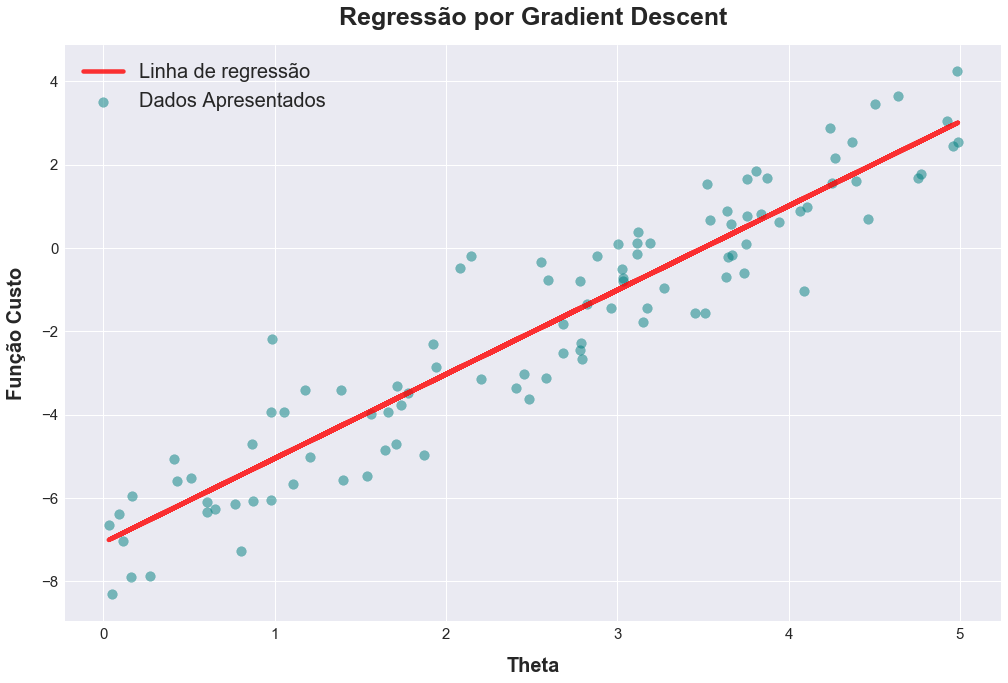

In [20]:
# Configurando style do grafico
plt.style.use('seaborn')

# Criando a figura do plot
fig = plt.figure(figsize=(13,8))

# Adicionando eixos na figura
ax = fig.add_axes([0,0,1,1])

# Coletando os thetas da função
theta0, theta1 = itera_theta(theta_0, theta_1, Learning_rate, X,y)

# Definindo lista com os pontos da reta para o plot
equação = list()

# Gerando os pontos da reta no formato ax+b onde a --> theta1 e b theta --> 0
for i in range(numero_de_amostras):
    equação.append(theta1*X[i]+theta0)


# Plotando o scatter do DataFrame
ax.scatter(X,y, c='teal', alpha=0.5, s=95, label='Dados Apresentados')

# Plotando os pontos da reta
ax.plot(X,equação, c='red', alpha=0.8, linewidth=4.5, label='Linha de regressão')

# Configurando titulo do eixo X
ax.set_xlabel('Theta', fontsize=20, labelpad=15, weight='bold')

# Configurando titulo do eixo Y
ax.set_ylabel('Função Custo', fontsize=20, labelpad=15, weight='bold')

# Configurando titulo 
ax.set_title('Regressão por Gradient Descent', fontsize=25, pad=20, weight='bold')

# Configurando tamanho dos numeros no eixo
ax.tick_params(labelsize=15)

# Adicionando a legenda
ax.legend(fontsize=20)


In [18]:
# Fontes consultadas

def fontes():
#     https://matplotlib.org/3.1.0/gallery/color/named_colors.html
#     https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
#     https://www.educative.io/edpresso/calculating-mean-squared-error-in-python
#     https://www.kaggle.com/residentmario/gradient-descent-with-linear-regression
#     https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f
    return True